In [4]:
import pandas as pd

dailyData = pd.read_csv("C:/Users/danie/OneDrive/DSC-550/week-4/DailyComments.csv")

In [5]:
len(dailyData)

7

In [6]:
import unicodedata
import sys

punctuation = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

for i in range(0, len(dailyData)):
    dailyData['comments'][i] = dailyData['comments'][i].translate(punctuation)

dailyData

,Day of Week,comments
0,Monday,Hello how are you
1,Tuesday,Today is a good day
2,Wednesday,Its my birthday so its a really special day
3,Thursday,Today is neither a good day or a bad day
4,Friday,Im having a bad day
5,Saturday,There s nothing special happening today
6,Sunday,Today is a SUPER good day


In [7]:
from nltk.tokenize import word_tokenize

def cleanText(texts, puntuation, column):
    for i in range(0, len(texts)):
        texts[column][i] = texts[column][i].translate(punctuation)
    return  texts[column]

def wordTokenizedStopText(texts, stopWords, column):
    filterTextList = []
    for i in range(0, len(texts)):
        filterText = ''
        wordTokenized = word_tokenize(texts[column][i])
        for word in wordTokenized:
            if word not in stopWords:
                filterText += word.lower() + ' '
        filterTextList.append(filterText)
    return filterTextList

def wordLemmizeText(texts, wordNetLemmatizer, column):
    filterTextList = []

    for i in range(0, len(texts)):
        filterText = ''
        wordTokenized = word_tokenize(texts[column][i])
        for word in wordTokenized:
            filterText += wordNetLemmatizer.lemmatize(word) + ' '
        filterTextList.append(filterText)
    return filterTextList

In [8]:

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filterTextList = []
for i in range(0, len(dailyData)):
    filterText = ''
    wordTokenized = word_tokenize(dailyData['comments'][i])
    for word in wordTokenized:
        if word not in stop_words:
            filterText += word.lower() + ' '
    filterTextList.append(filterText)

dailyData['tokenizedText'] = filterTextList
dailyData

,Day of Week,comments,tokenizedText
0,Monday,Hello how are you,hello
1,Tuesday,Today is a good day,today good day
2,Wednesday,Its my birthday so its a really special day,its birthday really special day
3,Thursday,Today is neither a good day or a bad day,today neither good day bad day
4,Friday,Im having a bad day,im bad day
5,Saturday,There s nothing special happening today,there nothing special happening today
6,Sunday,Today is a SUPER good day,today super good day


In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

filterTextList = []

for i in range(0, len(dailyData)):
    filterText = ''
    wordTokenized = word_tokenize(dailyData['tokenizedText'][i])
    for word in wordTokenized:
        filterText += lem.lemmatize(word) + ' '
    filterTextList.append(filterText)

dailyData['lemmatizedText'] = filterTextList
dailyData

,Day of Week,comments,tokenizedText,lemmatizedText
0,Monday,Hello how are you,hello,hello
1,Tuesday,Today is a good day,today good day,today good day
2,Wednesday,Its my birthday so its a really special day,its birthday really special day,it birthday really special day
3,Thursday,Today is neither a good day or a bad day,today neither good day bad day,today neither good day bad day
4,Friday,Im having a bad day,im bad day,im bad day
5,Saturday,There s nothing special happening today,there nothing special happening today,there nothing special happening today
6,Sunday,Today is a SUPER good day,today super good day,today super good day


In [10]:
def classifyCategoryAsNum(dataFrame, columnName):
    goodWords = ['good', 'nice', 'beautiful', 'super', 'special', 'confident', 'convince', 'ask', 'start']
    negativeWords = ['bad', 'horrible', 'sucks', 'nothing', 'not', 'negative', 'doubtful', 'uncertain', 'unsure']
    sentiment = []
    for text in dataFrame[columnName]:
        positive = 0
        negative = 0
        wordTokenized = word_tokenize(text)
        for word in wordTokenized:
            print(word)
            if word in goodWords:
                positive += 1
            elif word in negativeWords:
                negative += 1
        print('positive: ', positive, 'negative: ', negative, '\n')
        if positive > negative:
            sentiment.append('positive')
        elif positive < negative:
            sentiment.append('negative')
        else:
            sentiment.append('neutral')
    return sentiment

In [11]:
dailyData['sentiment'] = classifyCategoryAsNum(dailyData, 'lemmatizedText')

hello
positive:  0 negative:  0 

today
good
day
positive:  1 negative:  0 

it
birthday
really
special
day
positive:  1 negative:  0 

today
neither
good
day
bad
day
positive:  1 negative:  1 

im
bad
day
positive:  0 negative:  1 

there
nothing
special
happening
today
positive:  1 negative:  1 

today
super
good
day
positive:  2 negative:  0 



In [12]:
dailyData

,Day of Week,comments,tokenizedText,lemmatizedText,sentiment
0,Monday,Hello how are you,hello,hello,neutral
1,Tuesday,Today is a good day,today good day,today good day,positive
2,Wednesday,Its my birthday so its a really special day,its birthday really special day,it birthday really special day,positive
3,Thursday,Today is neither a good day or a bad day,today neither good day bad day,today neither good day bad day,neutral
4,Friday,Im having a bad day,im bad day,im bad day,negative
5,Saturday,There s nothing special happening today,there nothing special happening today,there nothing special happening today,neutral
6,Sunday,Today is a SUPER good day,today super good day,today super good day,positive


(array([3., 0., 0., 0., 0., 3., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

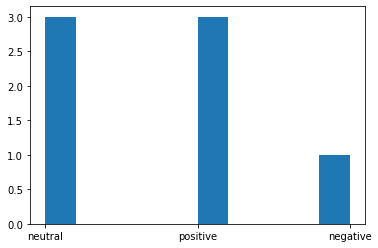

In [14]:
import matplotlib.pyplot as plt

plt.hist(dailyData['sentiment'])

#### My analysis was a basic weight of positive vs Negative words! The algorithm does a basic word analysis, take the weight and assigns positive, negative, or neutral